In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/config/workspace/dataset/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.value_counts().sum()

3658

In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df['education'].value_counts()

education
1.0    1720
2.0    1253
3.0     689
4.0     473
Name: count, dtype: int64

In [7]:
df['education']=df['education'].replace(np.nan,1.0)

In [8]:
df['BPMeds'].unique()

array([ 0.,  1., nan])

In [9]:
df['BPMeds']=df['BPMeds'].replace(np.nan,0.0)
df['cigsPerDay']=df['cigsPerDay'].replace(np.nan,9.0)
df['totChol']=df['totChol'].replace(np.nan,236.6)
df['BMI'] = df['BMI'].replace(np.nan,df['BMI'].mean())
df['glucose'] = df['glucose'].replace(np.nan,df['glucose'].mean())
df['heartRate']=df['heartRate'].replace(np.nan,75.32)

In [10]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Now All data Fill value, No Empty data is present in this dataset

/tmp/ipykernel_1070/1546658328.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


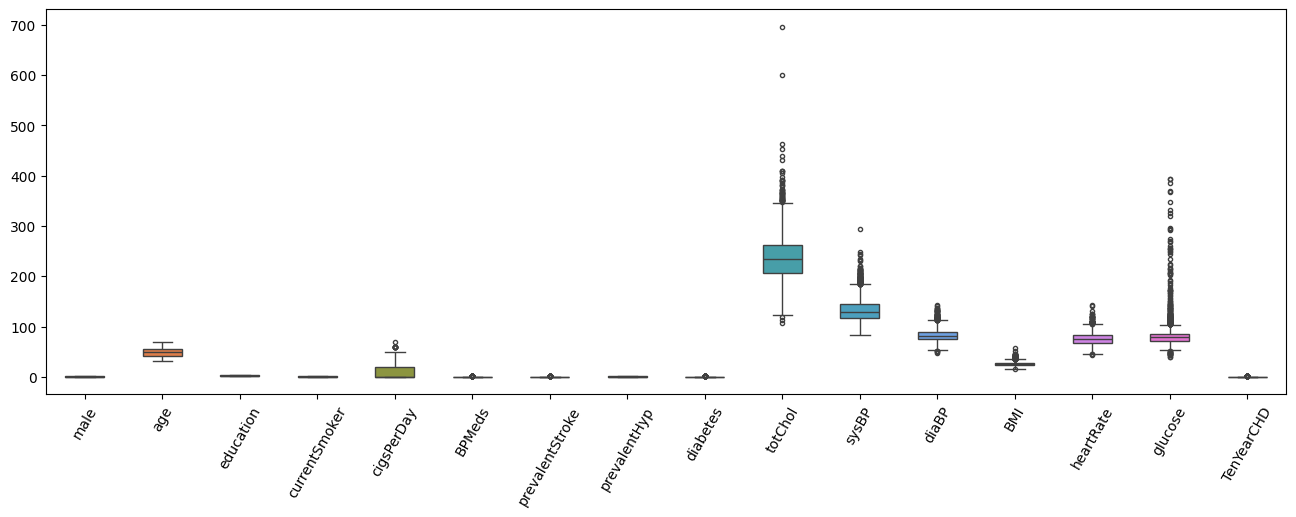

In [11]:
fig, ax = plt.subplots(figsize=(16,5))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

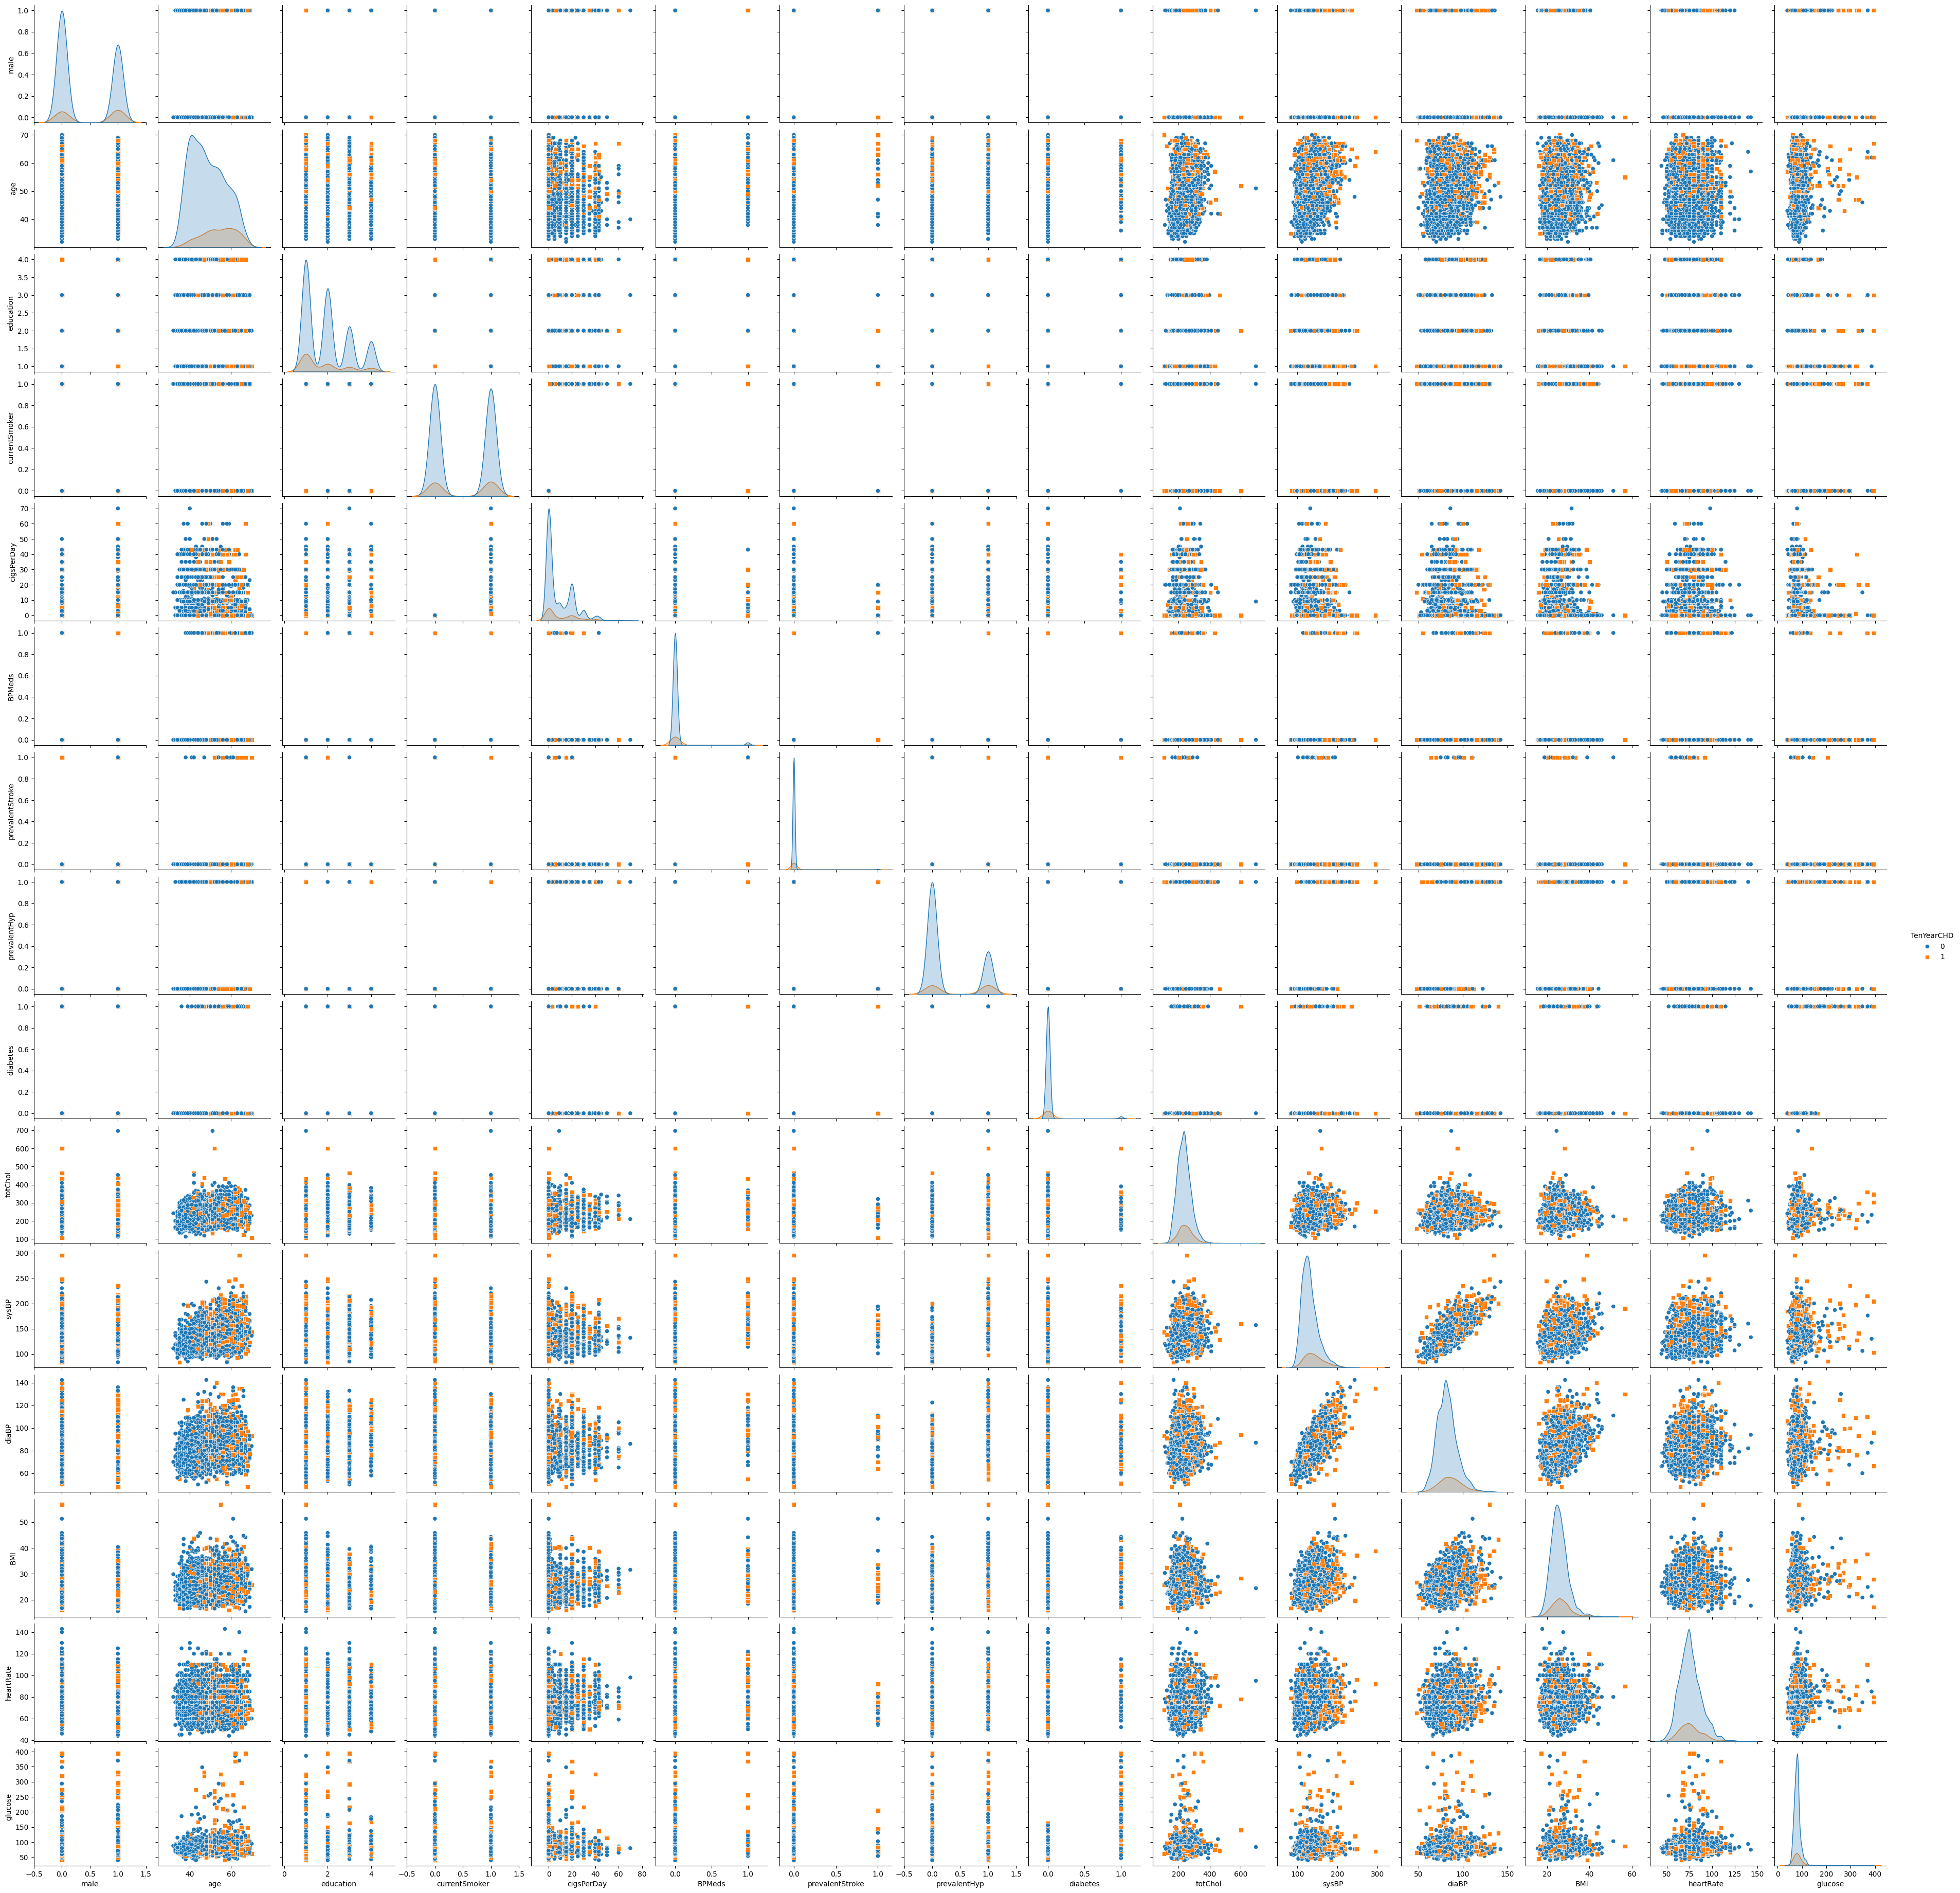

In [12]:
sns.pairplot(df, hue="TenYearCHD", markers=["o", "s"])
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
X = df.drop('TenYearCHD',axis=1)
y = df["TenYearCHD"]

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=51)

In [37]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('/config/workspace/models/scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [38]:
X_train, X_test = scaler_standard(X_train, X_test)

# DecisionTree model Training

In [17]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [18]:
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.851 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.850 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, sco

/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/config/.local/lib/python3.8/site-packages

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [19]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'log2',
 'splitter': 'random'}

In [20]:
classifier=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='sqrt',splitter='random')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', splitter='random')

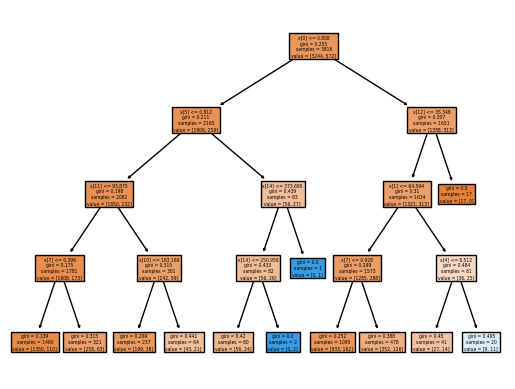

In [21]:
from sklearn import tree
plt.Figure(figsize=(48,10))
tree.plot_tree(classifier,filled=True)
plt.show()

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print("Accuracy Score : ",score)

Accuracy Score :  0.8325471698113207


In [24]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.83      0.91       423\n           1       0.01      1.00      0.03         1\n\n    accuracy                           0.83       424\n   macro avg       0.51      0.92      0.47       424\nweighted avg       1.00      0.83      0.91       424\n'

# Support Vector Classifier

In [25]:
param_grid = {'C': [0.1],
              'gamma': [1, 0.1],
              'kernel':['linear','rbf','polynomial']
              }

svc = GridSearchCV(SVC(kernel='linear'),param_grid=param_grid,cv=3,refit=True,verbose=2)
svc.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.7min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.4min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 1.8min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ..................C=0.1, gamma=1, kernel=polynomial; total time=   0.0s
[CV] END ..................C=0.1, gamma=1, kernel=polynomial; total time=   0.0s
[CV] END ..................C=0.1, gamma=1, kernel=polynomial; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.7min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.4min
[CV] END ....................C=0.1, gamma=0.1, ke

/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/config/.local/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/config/.local/lib/python3.8/site-packages/sk

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             verbose=2)

In [26]:
y_pred1=svc.predict(X_test)

In [27]:
print("Accuracy Score : ",accuracy_score(y_pred1,y_test))

Accuracy Score :  0.8301886792452831


# RandomForestClassifier And LogisticRegression

In [39]:
models={
    "RandomForestClassifier": RandomForestClassifier,
    "LogisticRegression": LogisticRegression
}

In [40]:
Random = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None)

In [41]:
Random.fit(X_train,y_train)
y_pred2 = Random.predict(X_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred2))

Accuracy Score :  0.8278301886792453


In [42]:
log = LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0)


In [43]:
log.fit(X_train,y_train)
y_pred3 = log.predict(X_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred3))

Accuracy Score :  0.8372641509433962


In [44]:
import pickle
file = open('/config/workspace/models/modelpredict.pkl','wb')
pickle.dump(Random,file)
file.close()

# RandomForestClaasssifier prediction is more Accurate : 83.49%